In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r"D:\Loan Approval Predictor\dataset\loan_ds.csv")

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [45]:
# Filling the NULL values

df["Gender"] = df['Gender'].fillna(df['Gender'].mode()[0])
df["Married"] = df['Married'].fillna(df['Married'].mode()[0])
df["Dependents"] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df["Self_Employed"] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df["LoanAmount"] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df["Loan_Amount_Term"] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df["Credit_History"] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [46]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

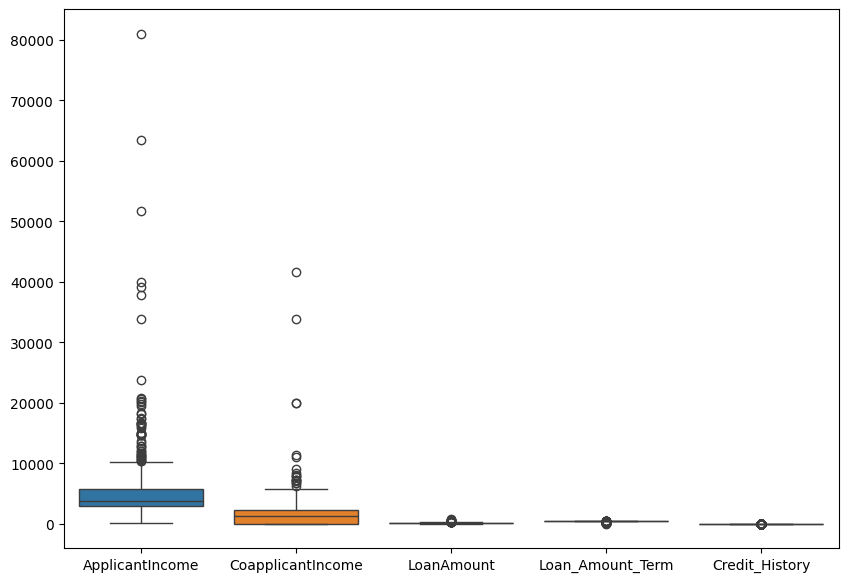

In [47]:
# Outliers
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)

In [48]:
loan_amount_range = df['LoanAmount'].describe()

# Extracting the minimum and maximum values
min_loan_amount = loan_amount_range['min']
max_loan_amount = loan_amount_range['max']

print(f"Minimum Loan Amount: {min_loan_amount}")
print(f"Maximum Loan Amount: {max_loan_amount}")

Minimum Loan Amount: 9.0
Maximum Loan Amount: 700.0


In [49]:
df[['ApplicantIncome', 'LoanAmount']] = (df[['ApplicantIncome', 'LoanAmount']] )* 100

In [50]:
df[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,584900,14641.216216
1,458300,12800.000000
2,300000,6600.000000
3,258300,12000.000000
4,600000,14100.000000
...,...,...
609,290000,7100.000000
610,410600,4000.000000
611,807200,25300.000000
612,758300,18700.000000


In [51]:
df.loc[df['CoapplicantIncome'] != 0, 'CoapplicantIncome'] *= 100

In [52]:
df[df['CoapplicantIncome'] == 0].count()

Gender               273
Married              273
Dependents           273
Education            273
Self_Employed        273
ApplicantIncome      273
CoapplicantIncome    273
LoanAmount           273
Loan_Amount_Term     273
Credit_History       273
Property_Area        273
Loan_Status          273
dtype: int64

In [53]:
df['Loan_Status'].value_counts(normalize = True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

In [54]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

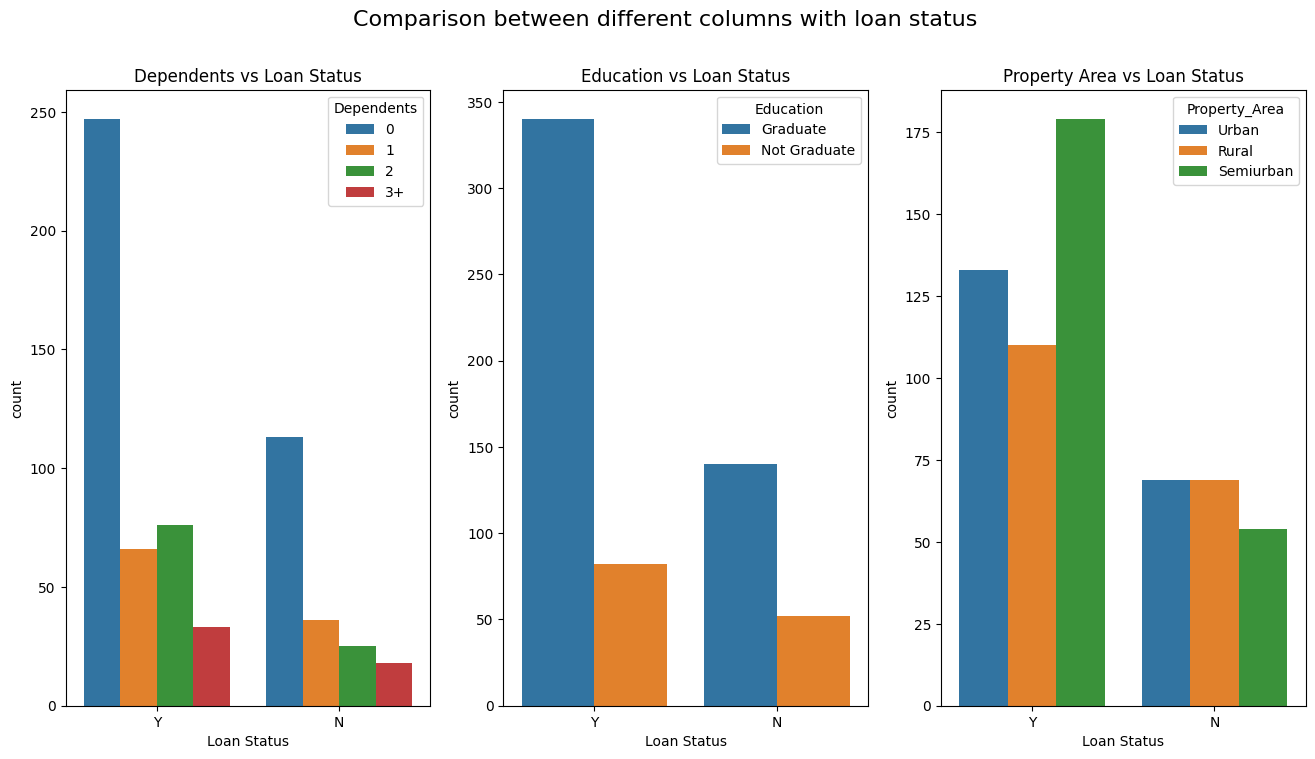

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sns.countplot(x='Loan_Status', hue='Dependents', data=df, ax=axes[0])
axes[0].set_title('Dependents vs Loan Status')
axes[0].set_xlabel('Loan Status')

sns.countplot(x='Loan_Status', hue='Education', data=df, ax=axes[1])
axes[1].set_title('Education vs Loan Status')
axes[1].set_xlabel('Loan Status')

sns.countplot(x='Loan_Status', hue='Property_Area', data=df, ax=axes[2])
axes[2].set_title('Property Area vs Loan Status')
axes[2].set_xlabel('Loan Status')

fig.suptitle('Comparison between different columns with loan status', fontsize=16)
plt.show()


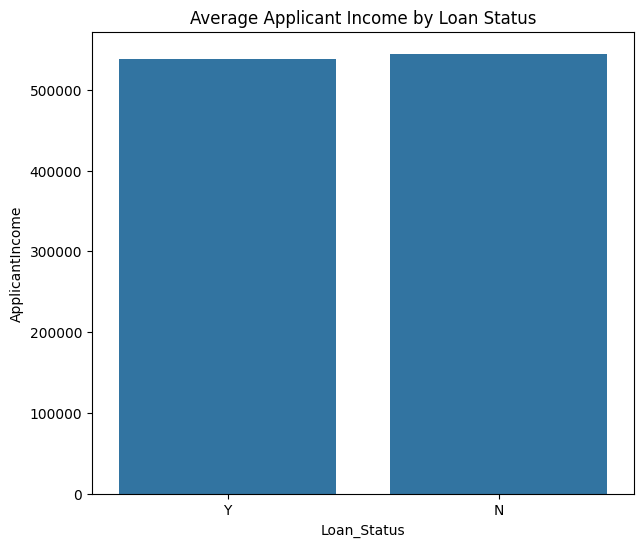

In [56]:
plt.figure(figsize=(7, 6))
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=df, errorbar = None)
plt.title('Average Applicant Income by Loan Status')
plt.show()

In [57]:
# Encoding the ordinal attributes

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df['Dependents_encoded'] = ordinal_encoder.fit_transform(df[['Dependents']])
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])

In [58]:
df['Dependents'] = df['Dependents_encoded']
df[['Dependents', 'Education']]

,Dependents,Education
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
609,0.0,0.0
610,3.0,0.0
611,1.0,0.0
612,2.0,0.0


In [59]:
# Our Encoder is reversing the value i.e keeping the Graduate person as 1 and Not Fraduate as 0 so we will re arrange them as: 
df['Education'] = df['Education'].map({0 : 1, 1 : 0})

In [60]:
df.drop('Dependents_encoded', axis = 1, inplace = True)

In [61]:
# Encoding the Property Area attribute using One Hot Encoding as here more than two classification are available i.e Rural/Urban/Semi-Urban

from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(sparse_output = False)

property_area_encoded = ohe_encoder.fit_transform(df[['Property_Area']])
property_area_encoded_df = pd.DataFrame(property_area_encoded, columns=ohe_encoder.get_feature_names_out(['Property_Area']))

df = pd.concat([df, property_area_encoded_df], axis = 1)
 

In [62]:
df.drop('Property_Area', axis = 1, inplace = True)

In [63]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')>

In [64]:
target_col = df.pop('Loan_Status')
df.insert(len(df.columns), 'Loan_Status', target_col)

In [65]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,Male,No,0.0,1,No,584900,0.0,14641.216216,360.0,1.0,0.0,0.0,1.0,Y
1,Male,Yes,1.0,1,No,458300,150800.0,12800.000000,360.0,1.0,1.0,0.0,0.0,N
2,Male,Yes,0.0,1,Yes,300000,0.0,6600.000000,360.0,1.0,0.0,0.0,1.0,Y
3,Male,Yes,0.0,0,No,258300,235800.0,12000.000000,360.0,1.0,0.0,0.0,1.0,Y
4,Male,No,0.0,1,No,600000,0.0,14100.000000,360.0,1.0,0.0,0.0,1.0,Y


In [66]:
# Encoding the nominal attributes

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cols_tobe_encoded = ['Gender', 'Married', 'Self_Employed']

label_encoder.fit(df[cols_tobe_encoded].values.flatten())
for col in cols_tobe_encoded:
    df[col] = label_encoder.transform(df[col])

In [67]:
# Splitting the data in Train and Test

from sklearn.model_selection import train_test_split
X = df.iloc[ : , : -1]
y = df.iloc[ : , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [68]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((429, 13), (185, 13), (429,), (185,))

In [69]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
X_train_scaled.tolist()

[[1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.07297464440321583,
  0.10399116807065543,
  0.16063675832127353,
  0.358974358974359,
  1.0,
  0.0,
  0.0,
  1.0],
 [1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.026011131725417438,
  0.04879160966712266,
  0.14616497829232997,
  0.7435897435897436,
  1.0,
  1.0,
  0.0,
  0.0],
 [1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.29255411255411257,
  0.0,
  0.5224312590448625,
  0.7435897435897436,
  1.0,
  1.0,
  0.0,
  0.0],
 [1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.05109461966604824,
  0.0,
  0.1316931982633864,
  0.7435897435897436,
  1.0,
  0.0,
  0.0,
  1.0],
 [1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.006481137909709339,
  0.12710298317613458,
  0.2301013024602026,
  0.7435897435897436,
  1.0,
  1.0,
  0.0,
  0.0],
 [1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.03525046382189239,
  0.08198334413324694,
  0.06801736613603473,
  0.358974358974359,
  1.0,
  0.0,
  1.0,
  0.0],
 [1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.06307977736549164,
  0.0,
  0.12301013024602027,
  0.7435897435897

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

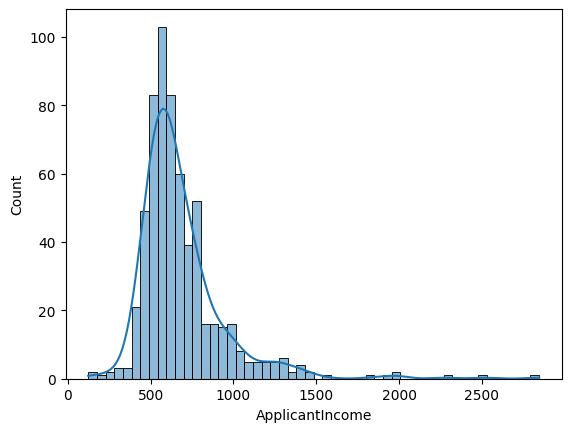

In [71]:
df_copy = df.copy()
df_copy['ApplicantIncome'] = np.sqrt(df_copy['ApplicantIncome'])
sns.histplot(data=df_copy, x = 'ApplicantIncome', kde = True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

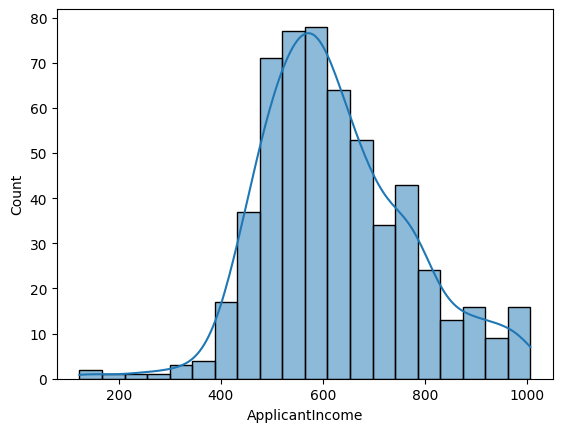

In [72]:
def outlier_treatment(x):
    x_copy = x.copy()
    q1 = np.percentile(x_copy['ApplicantIncome'], 25, method='midpoint')
    q3 = np.percentile(x_copy['ApplicantIncome'], 75, method='midpoint')
    
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    x_copy.drop(x_copy[(x_copy['ApplicantIncome'] < lower_bound) | (x_copy['ApplicantIncome'] > upper_bound)].index, inplace=True)
    
    return x_copy

df_copy = outlier_treatment(df)
df_copy['ApplicantIncome'] = np.sqrt(df_copy['ApplicantIncome'])
sns.histplot(data=df_copy, x = 'ApplicantIncome', kde = True)



In [73]:
df_copy['ApplicantIncome'].min(),df_copy['ApplicantIncome'].max()

(122.47448713915891, 1006.9260151570223)

<Axes: >

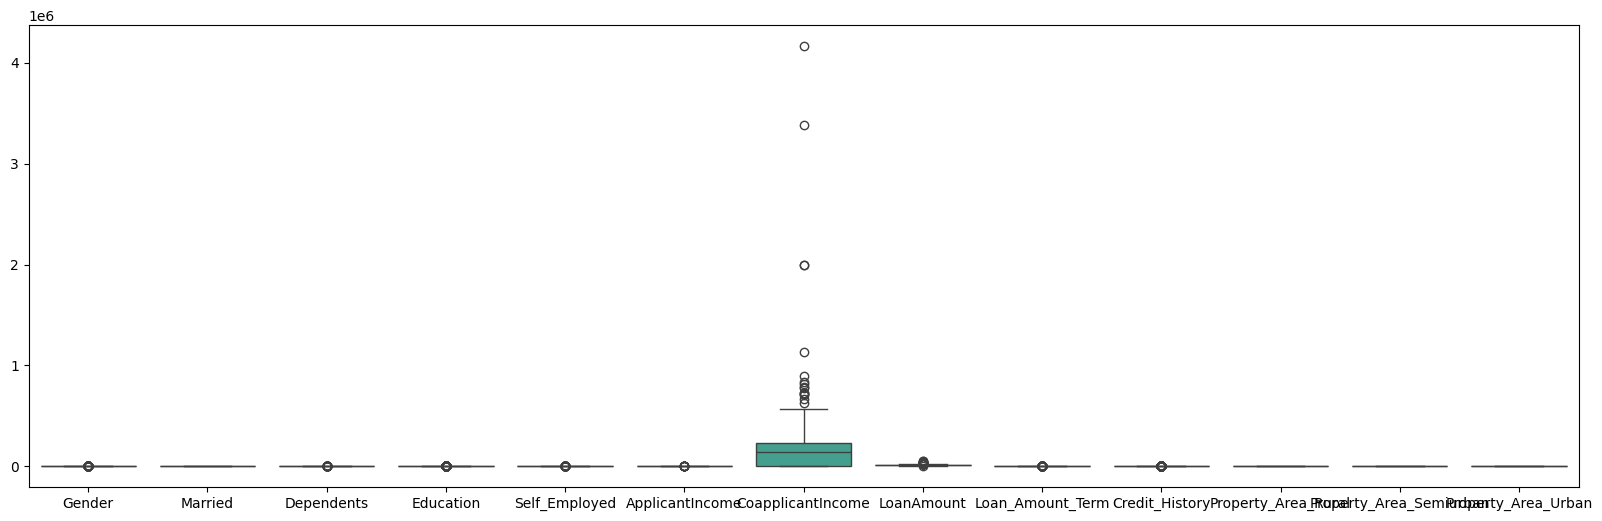

In [74]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_copy)

<Axes: ylabel='CoapplicantIncome'>

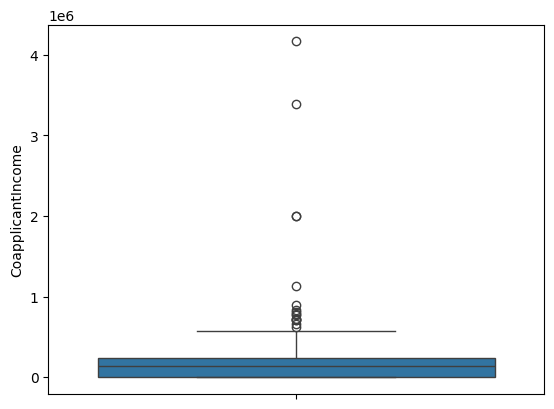

In [75]:
# df_copy['CoapplicantIncome_log'] = np.sqrt(df_copy['CoapplicantIncome'])
sns.boxplot(data=df_copy, y = 'CoapplicantIncome')

In [76]:
def outlier_treatment(x):
    x_copy = x.copy()

    # Calculate quantiles separately for each column
    q1_applicant = x_copy['ApplicantIncome'].quantile(0.25)
    q3_applicant = x_copy['ApplicantIncome'].quantile(0.75)
    
    q1_coapplicant = x_copy['CoapplicantIncome'].quantile(0.25)
    q3_coapplicant = x_copy['CoapplicantIncome'].quantile(0.75)

    # Calculate IQR separately for each column
    IQR_applicant = q3_applicant - q1_applicant
    lower_bound_applicant = q1_applicant - 1.5 * IQR_applicant
    upper_bound_applicant = q3_applicant + 1.5 * IQR_applicant

    IQR_coapplicant = q3_coapplicant - q1_coapplicant
    lower_bound_coapplicant = q1_coapplicant - 1.5 * IQR_coapplicant
    upper_bound_coapplicant = q3_coapplicant + 1.5 * IQR_coapplicant

    # Treat outliers for 'ApplicantIncome'
    x_copy = x_copy[(x_copy['ApplicantIncome'] >= lower_bound_applicant) & (x_copy['ApplicantIncome'] <= upper_bound_applicant)]

    # Treat outliers for 'CoapplicantIncome'
    x_copy = x_copy[(x_copy['CoapplicantIncome'] >= lower_bound_coapplicant) & (x_copy['CoapplicantIncome'] <= upper_bound_coapplicant)]

    return x_copy

df_copy = outlier_treatment(df[['ApplicantIncome', 'CoapplicantIncome']])


<Axes: ylabel='ApplicantIncome'>

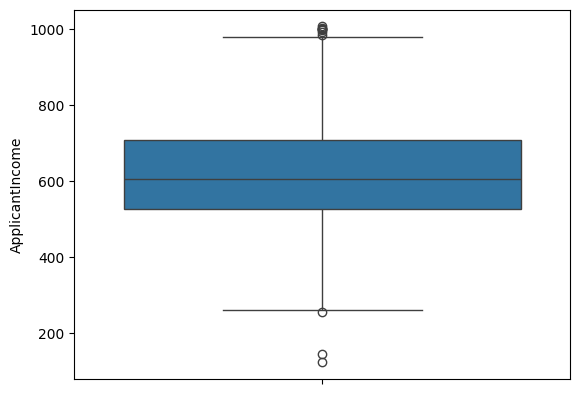

In [77]:
# sns.boxplot(data=df_copy, y = 'CoapplicantIncome')
df_copy['ApplicantIncome'] = np.sqrt(df_copy['ApplicantIncome'])
sns.boxplot(data=df_copy, y = 'ApplicantIncome')

In [78]:
df['CoapplicantIncome'] = df_copy['CoapplicantIncome']
df_copy['CoapplicantIncome']

0           0.0
1      150800.0
2           0.0
3      235800.0
4           0.0
         ...   
609         0.0
610         0.0
611     24000.0
612         0.0
613         0.0
Name: CoapplicantIncome, Length: 548, dtype: float64

<Axes: xlabel='loanamount', ylabel='Count'>

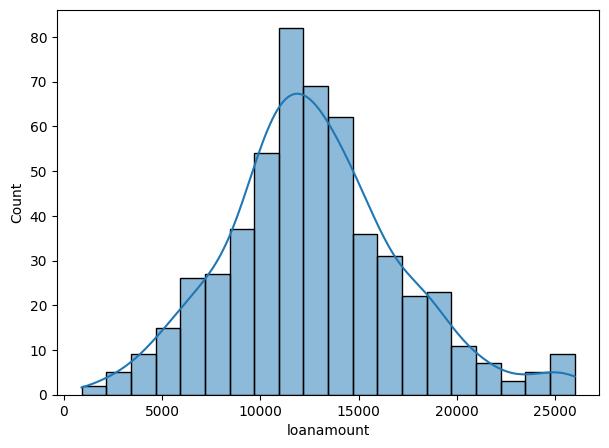

In [79]:
def outlier_treatment(x):
    x_copy = x.copy()
    q1 = np.percentile(x_copy['LoanAmount'], 25, method='midpoint')
    q3 = np.percentile(x_copy['LoanAmount'], 75, method='midpoint')
    
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    x_copy.drop(x_copy[(x_copy['LoanAmount'] < lower_bound) | (x_copy['LoanAmount'] > upper_bound)].index, inplace=True)
    
    return x_copy

# df_copy['loanamount'] = np.sqrt(df['LoanAmount'])
df_copy['loanamount'] = outlier_treatment(df[['LoanAmount']])
plt.figure(figsize = (7, 5))
sns.histplot(data=df_copy, x = 'loanamount', kde=True)

In [80]:
df['LoanAmount'] = df_copy['loanamount']

<Axes: ylabel='applicantincome_logged'>

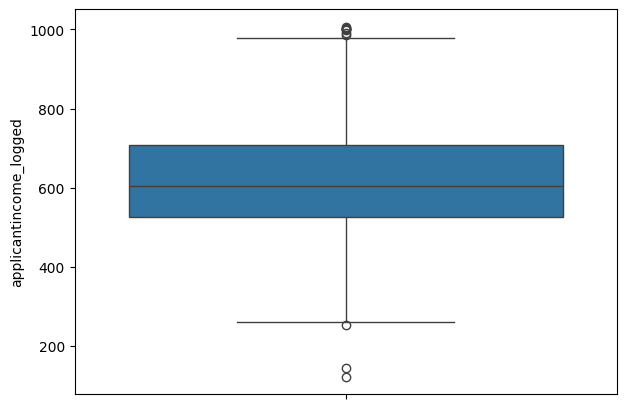

In [81]:
def outlier_treatment(x):
    x_copy = x.copy()
    q1 = np.percentile(x_copy['ApplicantIncome'], 25, method='midpoint')
    q3 = np.percentile(x_copy['ApplicantIncome'], 75, method='midpoint')
    
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    x_copy.drop(x_copy[(x_copy['ApplicantIncome'] < lower_bound) | (x_copy['ApplicantIncome'] > upper_bound)].index, inplace=True)
    
    return x_copy

df_copy['applicantincome'] = outlier_treatment(df[['ApplicantIncome']])
df_copy['applicantincome_logged'] = np.sqrt(df_copy['applicantincome'])
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_copy, y = 'applicantincome_logged')

In [82]:
df['ApplicantIncome'] = df_copy['applicantincome_logged']

<Axes: ylabel='ApplicantIncome'>

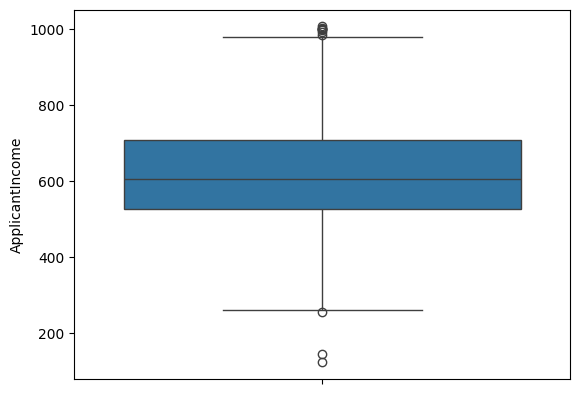

In [83]:
sns.boxplot(data=df, y = 'ApplicantIncome')

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

reg_model = LogisticRegression()

parameters = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C' : np.logspace(-3, 3, 7),
              'solver': ['lbfgs', 'liblinear', 'newton-cg']}

clf_model = GridSearchCV(reg_model, param_grid=parameters, scoring='accuracy', cv=5)
clf_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [85]:
clf_model.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [86]:
clf_model.best_score_

0.8133789329685364

In [87]:
best_model = clf_model.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pos_label = 'Y'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=pos_label)
recall = recall_score(y_test, y_pred, pos_label=pos_label)
f1 = f1_score(y_test, y_pred, pos_label=pos_label)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8
Precision: 0.7857142857142857
Recall: 0.9924812030075187
F1 Score: 0.8770764119601329


In [89]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(clf_model, file)
    
with open('scaler_encoder.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
    
with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(ordinal_encoder, file)
    
with open('ohe_encoder.pkl', 'wb') as file:
    pickle.dump(ohe_encoder, file)